<a href="https://colab.research.google.com/github/V24039/Neural_Network_wine_dataset/blob/master/Neural_network_using_wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1-x)

def relu(x):
     return abs(x) * (x > 0)

def drelu(x):
     return 1. * (x > 0.)

def lrelu(x):
    return np.where(x > 0., x, x * 0.01)

def dlrelu(x):
    dx = np.ones_like(x)
    dx[x < 0.] = 0.01
    return dx

def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1.0 - (np.power(np.tanh(x),2))

In [ ]:
def feed_forward(data_in, w0,w1,w2,w3,b):
  layer0 = data_in
  layer1 = relu(np.dot(layer0,w0))
  layer2 = relu(np.dot(layer1,w1))
  layer3 = relu(np.dot(layer2,w2))
  layer4 = np.dot(layer3, w3) +b

  return layer0,layer1,layer2,layer3,layer4

In [ ]:
def accuracy(xtest,ytest):
  correct=0
  layer0,layer1,layer2,layer3,layer4=feed_forward(xtest,w0,w1,w2,w3,b)
  for i in range(len(xtest)):
    if np.argmax(layer4[i])==np.argmax(ytest[i]):
      correct+=1
  return f"Accuracy: {(correct*100)/len(ytest)}"

In [ ]:
def backpropogate(i, layer0, layer1, layer2, layer3, layer4, actual_y, w0,w1,w2,w3, b, learning_rate):

    op_delta = layer4 - actual_y
    dh4 = np.dot(layer3.T, op_delta)
    
    l3_error = op_delta.dot(w3.T)
    l3_delta = l3_error * drelu(layer3)
    dh3 = np.dot(layer2.T, l3_delta)
    
    l2_error = l3_delta.dot(w2.T)
    l2_delta = l2_error * drelu(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * drelu(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w3 = w3 - (learning_rate * dh4)
    w2 = w2 - (learning_rate * dh3)
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
    b = b - (learning_rate * np.mean(op_delta))

    if i%50==0 and (i!=0):
        loss = np.mean(np.power(layer4-actual_y, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1000 == 0:
            print("\n", int(i), loss)
        
    return w0, w1,w2,w3,b

In [ ]:
wine=load_wine()
d = pd.DataFrame(wine.data,columns=wine.feature_names)

d = (d-d.min())/ (d.max()- d.min())
x = np.array(d.iloc[:,:-1])
y = np.array(d.iloc[:,-1])
y = y.reshape(len(y), 1)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)
print(xtrain)#,'\n\n',xtest,'\n\n',ytrain,'\n\n',ytest)

[[0.66578947 0.1916996  0.50802139 ... 0.41382253 0.38211382 0.77289377]
 [0.69736842 0.21541502 0.53475936 ... 0.21843003 0.6097561  0.58608059]
 [0.54736842 0.05335968 0.18181818 ... 0.34300341 0.5203252  0.6996337 ]
 ...
 [0.33157895 0.13241107 0.3315508  ... 0.13822526 0.6097561  0.53846154]
 [0.5        0.40909091 0.71657754 ... 0.28327645 0.23577236 0.38095238]
 [0.56052632 0.55928854 0.42245989 ... 0.23208191 0.09756098 0.15018315]]


In [ ]:
w0 = np.random.random((12,50))
w1 = np.random.random((50,30))
w2 = np.random.random((30,5))
w3 = np.random.random((5,1))
b = np.random.random((1,1))
epochs = 10000

In [ ]:
loss_curve = []
iters = []

In [ ]:
for i in range(epochs):
    layer0, layer1, layer2, layer3, layer4 = feed_forward(xtrain, w0,w1,w2,w3,b)
    w0, w1,w2,w3,b = backpropogate(i,layer0, layer1, layer2, layer3, layer4, ytrain, w0,w1,w2,w3, b, 0.01 )

In [ ]:
layer0,layer1,layer2,layer3,layer4 = feed_forward(xtest,w0,w1,w2,w3,b)
loss = np.mean(np.power(layer4-ytest,2))
loss

0.059808908039512464

In [ ]:
acc=accuracy(xtest,layer4)
print(acc)

Accuracy: 43.54838709677419


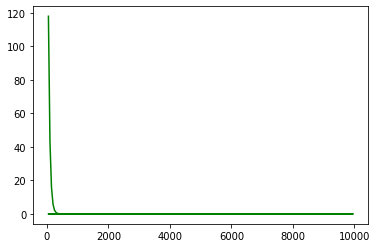

In [ ]:
plt.plot(iters,loss_curve, 'g-')